# Иерерхиеческое обучение

$$ $$

## Марковский процесс

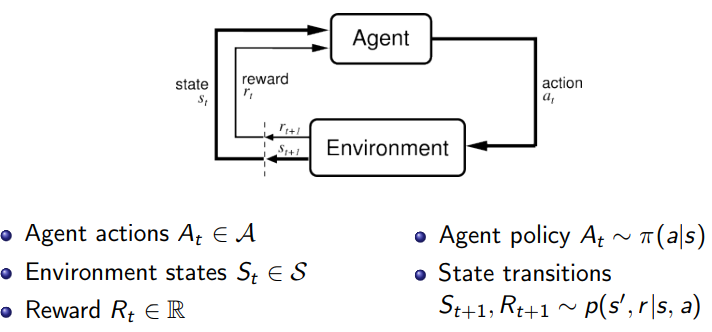

Value-функция:

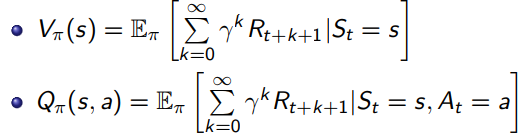

Оптимальность:
$$ V^*(s) = max_a \sum_{s',r} p(s',r|s,a)[r+\gamma V^*(s')] $$

</font>

$$ $$
$$ $$
$$ $$
$$ $$


## Частично-марковский процесс

#### Определение
Добавим к определению Марковского процесса время переходов между состояниями $\tau_t$
- Множество состояний S
- Динамика переходов $ p(s',\tau| s) = p(s'|s)p(\tau | s) $

#### Value-функции и политика


- $V^{\pi} = \sum_{i}\gamma^{t_i}E[R(s_{t_i})]$, где $t_i = \tau_0 + \tau_1 + \dots + \tau_i$


- Оптимальная политика $\pi^{*}$, такая что $V^{\pi^{*}}(s) \ge V^{\pi} \space \forall s, \pi $


- Уравнение Беллмана:
$$ V^*(s) = max_{a} R(s,a) + \sum_{s', \tau} p(s',\tau | s,a) \gamma^{\tau} V^* (s') $$


- TD-ошибка:
$$ r + \gamma^\tau max_{a'} Q(s',a') - Q(s,a) $$


## Policy Gradinet Theorem

Пусть:

$$ \rho(\pi) = E[ \sum^{\infty}_{t=1} \gamma ^ {t-1} r_t | s_0, \pi ] $$

$$ Q^{\pi}(s,a) = E[ \sum_{k=1}^{\infty} \gamma^{k-1} r_{t+k} | s_t = s, a_t = a, \pi ] $$

$$ d^{\pi}(s) = \sum^{\infty}_{t=0} \gamma^t P( s_t = s | s_0, \pi ) $$

**Теорема**

$$ \frac{d \rho}{d \theta} = \sum_s d^{\pi}(s) \sum_a \frac{d \pi(s,a)}{d \theta} Q^{\pi}(s,a) $$


$$ $$

$$ $$
$$ $$
$$ $$

## Марковский процесс с опциями

### Опции:

Опция $\omega$ определяется, как тройка $ ⟨ I_{\omega}, \pi_{\omega}, \beta_{\omega} ⟩$, где:

- $I_{\omega} \subset S$ - множество начальных состояний
- $\pi_{\omega}(a|s)$ - под-политика(политика опций)
- $\beta_{\omega}(s)$ - вероятность завершения опции

В начальном состоянии опция выбирается из доступных с помощью мета-политики $\pi_{\Omega}(\omega|s)$. Затем управление переходит к под-политике $\pi_{\omega}$. Кода выполнение последней завершается $\beta_{\omega}(s)$, управление вновь переходт к мета-политике $\pi_{\Omega}(\omega|s)$. И так далее.




### Пример
Если задача в открытии двери ключом мета-политика сначала выбирает опцию "взять ключ", подполитика которой ищет ключ на столе. Если ключ удалось взять, управление передается мета-политике, которая выбирает опцию "вставить ключ в замочную скважину", подполитика которой пытается это сделать.

### Связь с частично-марковским процессом




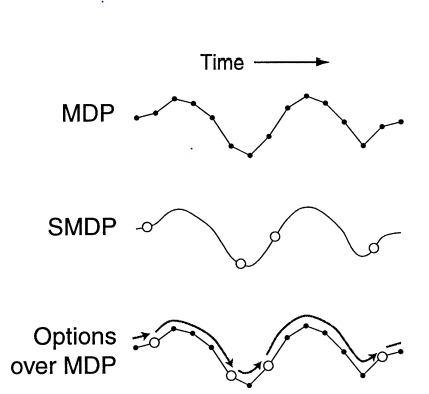

$$ $$


### Достоинства опции:
- Sample efficency(более коротки траектрии)
- Более умное исследование среды
- Интерпретируемость

### Недостатки опции:
- Введение опций не всегда упрощают решение задача, а иногда усложняют
- Большее количество параметров модели



## Алгоритм Option-Critic

**Введем Q-функцию для мета-политики:**

$$Q_{\Omega}(s,\omega) = \sum_a \pi_{\omega}(a|s)Q_{U}(s, \omega, a) $$

**Введем Q-функию для под-политики:**

$$Q_{U}(s,\omega,a) = \sum_{s',r} p(s',r|s,a)[ r(s,a) + \gamma U(\omega,s') ] $$

**Введем U(utility) - функию:**

$$U(\omega, s') = (1-\beta_{\omega}(s'))Q_{\Omega}(s', \omega) + \beta_{\omega}(s')V_{\Omega}(s')$$

*U - матожидание V по $\beta_{\omega}(s')$*

**Введем V-функцию для мета-политики:**

$$V_{\Omega}(s') = \sum_{\omega'}\pi_{\Omega}(\omega'|s') Q_{\Omega}(s', \omega')$$


$$ $$

Параметризуем под-политику $\omega$ параметрами $\theta$, а ее завершающую ф-цию $\beta$ параметрами $v$

Продиффиренцируем под-политику:
$$\frac{ \partial Q_{\Omega}(s,\omega) }{ \partial \theta } = (\sum_a \frac{\partial \pi_{\omega,\theta}}{\partial \theta} Q_{U}(s,\omega,a) ) + \sum_a \pi_{\omega, \theta}(a | s) \sum_{s'} \gamma p(s')\frac{\partial U(\omega, s')}{\partial \theta}$$

Теорема 1.1:
$$ \frac{ \partial Q_{\Omega}(s,\omega) }{ \partial \theta } = \sum_{s,\omega} \mu_{\Omega}(s,\omega | s_0, \omega_0) \sum_a \frac{\partial \pi_{\omega, \theta}(a | s)}{\partial \theta} Q_U(s,\omega,a) $$
$$ \mu_{\Omega}(s,\omega|s_0,\omega_0)=\sum_{t=0}^{\infty} \gamma^t p(s_t=s,\omega_t=\omega|s_0,\omega_0) $$

Теорема 2.1:
$$ \frac{ \partial Q_{\Omega}(s,v) }{ \partial v } = -\sum_{s,\omega} \mu_{\Omega}(s,\omega | s_1, \omega_0) \sum_a \frac{\partial \beta_{\omega, v}(a | s)}{\partial v} A_U(s,\omega,a) $$
$$ \mu_{\Omega}(s,\omega|s_1,\omega_0)=\sum_{t=0}^{\infty} \gamma^t p(s_{t+1}=s,\omega_t=\omega|s_1,\omega_0) $$
$$A_U(s, \omega, a) = Q_U(s, \omega, a) - V(s)$$

Схема алгоритма:

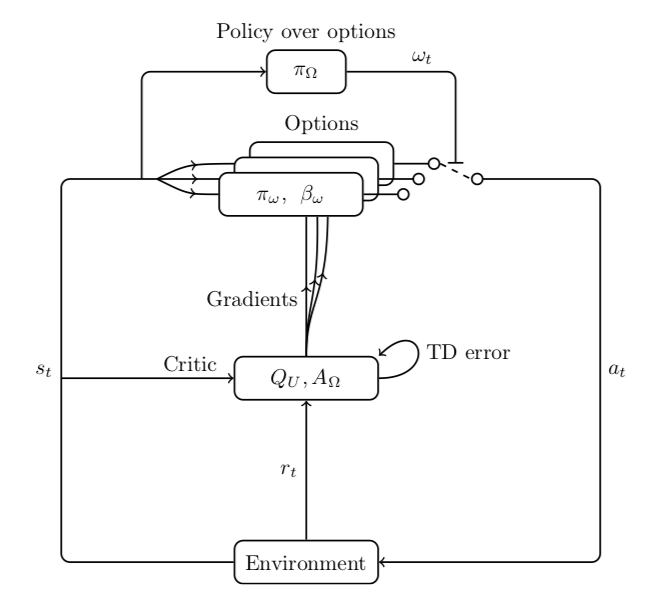

### Табличный подход:

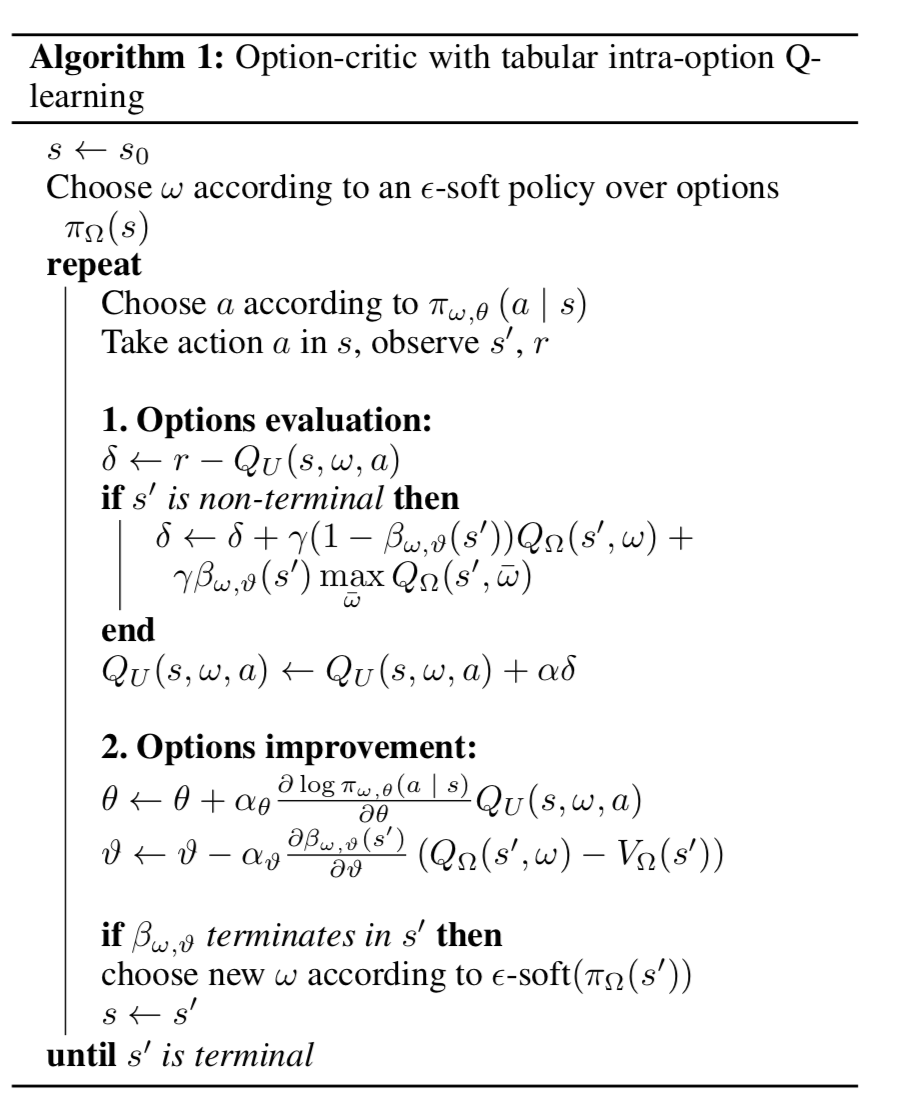


### DL подход

Считать $Q_U$ дорого и его можно выразить через $Q_{\Omega}$, что мы и сделаем:

$$ Q_U(s,\omega, a) = E_{s' ~ P}[ r(s,a) + \gamma U(\omega, s') | s, \omega, a ] $$

$$ \hat{Q_U}(s, \omega, a) = r + \gamma(1-\beta(s'))Q_{\Omega}(s', \omega) + \gamma \beta(s') max_{\omega'} Q_{\omega}(s',\omega') $$

            (Можно представить, как Critic для макро-действий)

$$ V_{\Omega}(s') = max_{w'} Q_{\Omega}(s', \omega') $$

Сеть будет иметь 3 головы:
- |w| выходов Q(s)
- |w x a| выходов для intra-action политики
- |w| выходов для $\beta(s)$


### Пример

Обучим табличного агента доходить до цели в среде из 4 комнат. Вероятность проскальзывания = 1/3.
Будем использовать 4 опции.

In [1]:
from hier1.option_critic_table import *

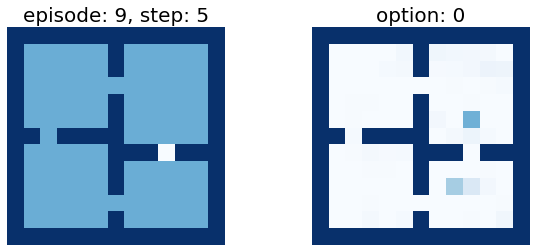

Goal reached!


In [2]:
train_oc()

Ссылки:
- [Paper](https://arxiv.org/pdf/1609.05140.pdf)

## MAXQ


### Основные понятия

$ M $ - Markov Decision Process

$ {M_0,...,M_n} $ - его подпроцессы(*подзадачи*), определенные условиями завершения $T_i$ и множествами действий $A_i$(которые также могут быть подпроцессами).

Цель каждого подпроцесса - достичь завершающего условия $T_i$ и максимизировать награду

Иерархическая политика - множество политик $\pi = {\pi_0,...,\pi_n}$ для каждой подзадачи соответственно.

Пусть $p(s',N|s,i)$ - вероятность того, что $M_i$ запущенная в s завершится в s' через N шагов.

Иерархическая политика рекрсивна оптимальна, если ее подполитики оптимальны(при условии того, что графы не содержат циклов).

### Q и V функции
$V(i,s)$ - функция ценности подзадачи i в s. Это ценность следования некоторой политике начиная в s до завершения подзадачи в s' согласно $T_i(s')$

$Q(i,s,j)$ - Q значение подзадачи i, запускающей действие j в шаге s, а затем придерживающейся текущей политики до ее завершения.

MAXQ разложение основано на наблюдении, что каждая подзадача $M_i$ может быть представлена, как Semi-Markov Process, где награда за выполнение действия j в s есть $V(j,s)$

### Уравнение Беллмана

Можно вывести уравнение Беллмана для MaxQ:

$$ Q(i,s,j) = \sum_{s',N}p(s',N|s,j) [V(j,s) + \gamma^N max_{j'} Q(i,s',j')] = V(j,s) + C(i,s,j) $$

Здесь C - *функция завершения(completion function)*, определяющая стоимость завершения задачи i после выполнения j

Уравнение является рекурсивным и завершается $V(a,s)$ - наградой в предтерминальном состоянии

### Обучение

MAXQ-Q learning - табличный алгоритм, вариант табличного Q-learning.

В подзадаче $M_i$ на шаге s выбирается выбирается действие(подзадача j) и выполняется его политика. Когда оно завершается, попдает в s' через N шагов, обновляем $C(i,s,j)$, согласно:
$$C(i,s,j):=(1-\alpha)C(i,s,j)+\alpha_t \gamma^N [max_{a'}V(a',s) + C(i,s',a')] $$


### Псевдокод
Приведем псевдокод алгоритма MAXQ-0(одношаговое обновление):

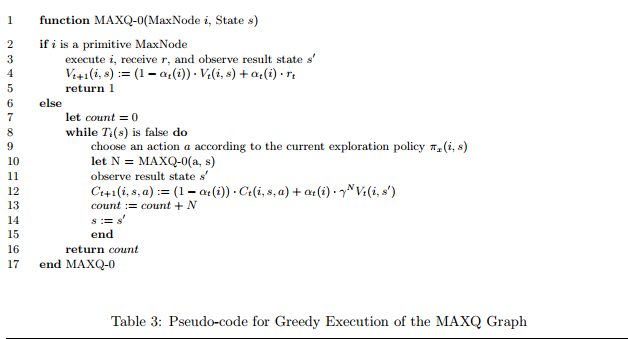

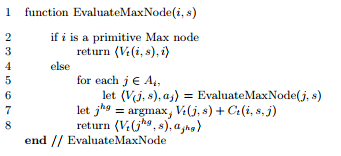

#### Материалы

- [State Abstraction in MAXQ Hierarchical
Reinforcement Learning](https://papers.nips.cc/paper/1770-state-abstraction-in-maxq-hierarchical-reinforcement-learning.pdf)

- [The MAXQ Method for Hierarchical Reinforcement Learning](https://pdfs.semanticscholar.org/fdc7/c1e10d935e4b648a32938f13368906864ab3.pdf)

## Подцели(sub-goals)

Для того, чтобы иметь возмножность обучать агента в играх с редкими ревордами требуется расширить опции множеством подцелей $g_i(s) \in G$

Выполнение или невыполнение подцели влияет на ревод опции.

Существуют методы, которые требуют заранее заданного множества целей для обучения, например:
- [Hierarchical Deep Reinforcement Learning: Integrating Temporal Abstraction and Intrinsic Motivation](https://papers.nips.cc/paper/6233-hierarchical-deep-reinforcement-learning-integrating-temporal-abstraction-and-intrinsic-motivation.pdf)

- [LEARNING MULTI-LEVEL HIERARCHIES WITH HINDSIGHT](https://arxiv.org/pdf/1712.00948.pdf)


## FeUdal

Идея достижение под-целей(sub-goals).

Архитектура делится на 2 компонента: Worker и Manager.

Manager - получает на вход скрытое представление состояния и производит цели для Worker'a, который оринтируясь на них выполняет действия.

Цель - это достижение какого-либо стейта


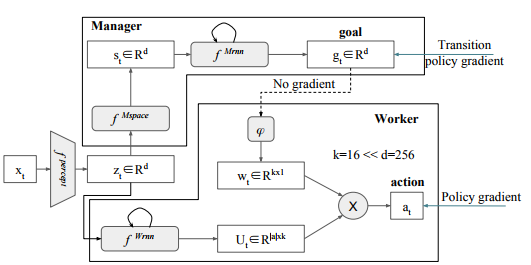

### Обучение:

Manager обучается согласно такому градиенту:

$$\nabla g_t = A^M_t \nabla_{\theta}d_cos(s_{t+c},g_t(\theta)) $$

Где $ A^M_t = R_t - V^M_t(x_t, \theta) $

Worker максимизирует реворд согласно цели, данной Manager'ом:

$$ r^I_t = 1/c \sum_{i=1}^c d_{cos} (s_t-s_{t-i}, g_{t-i}) $$

И обучается с помощью policy gradient

Политика Worker'а:

$$ \pi_t = softmax(U_t w_t) $$

Для упрощения обучения размерность состояний понижается до $d$

## Применение

### Игры со сложной структурой

#### Starcraft

![](https://hightech.fm/wp-content/uploads/2019/01/screenshot.width-1500.png)



#### Minecraft

![](https://c.dns-shop.ru/thumb/st4/fit/wm/800/650/66dedfbfbc0295b92ba6f9466315eb34/458ca526b8530e8ac15f57cc5a500ca0a07567321a79bff08a783666c78058bd.jpg)

### Роботы со сложным поведением